# Pretrained-Model execution code 구현
별도의 학습 없이 즉시 다운로드하여 사용할 수 있는 모델 탐색 (허브, 라이브러리 등등)<br>
해당 모델 빌드 및 추론 수행 구현

## Keras.applications pm library test

In [26]:
import  tensorflow.keras.applications as kerasapp
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import Input

import numpy as np
import matplotlib.pyplot as plt

In [27]:
model = kerasapp.ResNet50(weights='imagenet')

In [28]:
img_path = 'cloud-edge-aicontainers/v2/bhc/edge_pm/data/island2.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [29]:
preds = model.predict(x)

1/1 [==============================] - 1s 653ms/step


In [30]:
print('Prediction : ', decode_predictions(preds, top=5)[0])

Prediction :  [('n09246464', 'cliff', 0.6049693), ('n09399592', 'promontory', 0.16878514), ('n09193705', 'alp', 0.08371159), ('n09468604', 'valley', 0.021693189), ('n02980441', 'castle', 0.011216546)]


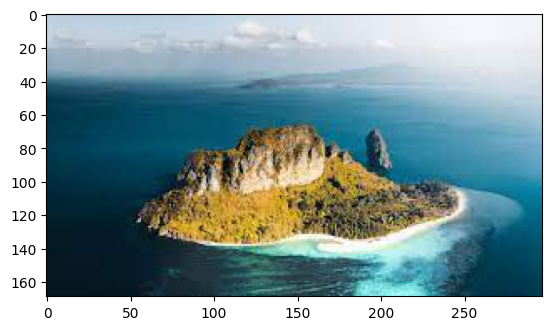

In [31]:
data = plt.imread(img_path)
plt.imshow(data)

### 작동하지 않는 모델들
1. InceptionV3
2. InceptionResNetV2
3. NASNetLarge<br>
...<br>
..<br>
.

이 외에서 다수 모델이 작동하지 않으며 현재 밝혀진 원인은 input layer와 데이터의 차원이 맞지 않은 현상.<br>
각 모델의 레이어 구조를 조사한 뒤 model selection 과정에서 input 차원에 맞게 데이터 전처리를 수행하도록 코드 수정<br>
on progress

### 모델 구조 수정 후 빌드
input layer를 전처리 과정에 맞게 수정하여 붙이고 모델 동작 테스트

In [39]:
input_tensor = Input(shape=(224,224,3))

## 기존 NASNetLarge의 input shape==(331,331,3)
model = kerasapp.NASNetLarge(input_tensor=input_tensor, weights='imagenet', include_top=True)

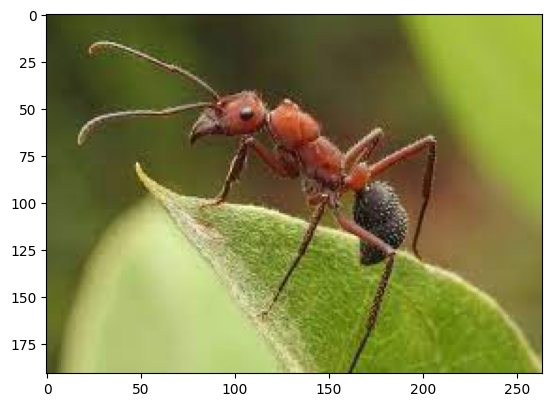

In [40]:
img_path = 'cloud-edge-aicontainers/v2/bhc/edge_pm/data/ant.jpeg'

## preprocessing
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

## show image
data = plt.imread(img_path)
plt.imshow(data)

In [41]:
preds = model.predict(x)
print('Prediction : ', decode_predictions(preds, top=5)[0])

1/1 [==============================] - 3s 3s/step
Prediction :  [('n03124043', 'cowboy_boot', 0.9980445), ('n03216828', 'dock', 0.0006094215), ('n02088466', 'bloodhound', 0.00052691664), ('n04355933', 'sunglass', 0.00033595038), ('n02443484', 'black-footed_ferret', 0.00020001332)]


In [42]:
## what else..?

### 코드 정리
사용자가 원하는 모델을 불러와 추론 수행을 진행할 수 있도록 구현<br>

In [ ]:
def model_select():
    
    model_type = str(input('insert your model : '))
    input_tensor = Input(shape=(224,224,3))

    if model_type == 'Xception':
        
        model = kerasapp.ResNet50(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'VGG16':

        model = kerasapp.VGG16(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'VGG19':

        model = kerasapp.VGG19(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'ResNet50':

        model = kerasapp.ResNet50(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'ResNet50V2':

        model = kerasapp.ResNet50V2(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'ResNet52':

        model = kerasapp.ResNet52(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'ResNet52V2':

        model = kerasapp.ResNet52V2(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'ResNet101':

        model = kerasapp.ResNet101(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'ResNet101V2':

        model = kerasapp.ResNet101V2(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'ResNet152':

        model = kerasapp.ResNet152(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'ResNet152V2':

        model = kerasapp.ResNet152V2(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'InceptionV3':

        model = kerasapp.InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'InceptionResNetV2':

        model = kerasapp.InceptionResNetV2(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'MobileNet':

        model = kerasapp.MobileNet(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'MobileNetV2':

        model = kerasapp.MobileNetV2(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'DenseNet121':

        model = kerasapp.DenseNet121(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'DenseNet169':

        model = kerasapp.DenseNet169(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'DenseNet201':

        model = kerasapp.DenseNet201(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'NASNetMobile':

        model = kerasapp.NASNetMobile(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'NASNetLarge':

        model = kerasapp.NASNetLarge(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'EfficientNetB0':

        model = kerasapp.EfficientNetB0(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'EfficientNetB1':

        model = kerasapp.EfficientNetB1(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'EfficientNetB2':

        model = kerasapp.EfficientNetB2(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'EfficientNetB3':

        model = kerasapp.EfficientNetB3(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'EfficientNetB4':

        model = kerasapp.EfficientNetB4(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'EfficientNetB5':

        model = kerasapp.EfficientNetB5(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'EfficientNetB6':

        model = kerasapp.EfficientNetB6(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'EfficientNetB7':

        model = kerasapp.EfficientNetB7(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'EfficientNetV2B0':

        model = kerasapp.EfficientNetV2B0(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'EfficientNetV2B1':

        model = kerasapp.EfficientNetV2B1(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'EfficientNetV2B2':

        model = kerasapp.EfficientNetV2B2(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'EfficientNetV2B3':

        model = kerasapp.EfficientNetV2B3(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'EfficientNetV2S':

        model = kerasapp.EfficientNetV2S(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'EfficientNetV2BM':

        model = kerasapp.ResNet101(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'EfficientNetV2BL':

        model = kerasapp.EfficientNetV2BL(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'ConvNeXtTiny':

        model = kerasapp.ConvNeXtTiny(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'ConvNeXtSmall':

        model = kerasapp.ConvNeXtSmall(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'ConvNeXtBase':

        model = kerasapp.ConvNeXtBase(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'ConvNeXtLarge':

        model = kerasapp.ConvNeXtLarge(input_tensor=input_tensor, weights='imagenet', include_top=True)

    elif model_type == 'ConvNeXtXLarge':

        model = kerasapp.ConvNeXtXLarge(input_tensor=input_tensor, weights='imagenet', include_top=True)
    

    return model

In [ ]:
## model selection
model = model_select()

## inferencing
preds = model.predict(x)
print('Prediction : ', decode_predictions(preds, top=5)[0])